In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv('D:\linear regression dataset.csv')

In [3]:
df

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984
...,...,...
695,58.0,58.595006
696,93.0,94.625094
697,82.0,88.603770
698,66.0,63.648685


In [25]:
print(df.isnull().sum())
df=df.dropna(subset=['x', 'y'])
print(df.isnull().sum())

x    0
y    0
dtype: int64
x    0
y    0
dtype: int64


In [26]:
x_mean=df['x'].mean()
y_mean=df['y'].mean()
print(f'{x_mean} {y_mean}')

50.01430615164521 49.939869170457804


In [28]:
xi_x_mean=[]
#xi_x_mean=[df['x']-x_mean]
j=0;
for i in df['x']:
    xi_x_mean.append(i-x_mean)
    #print(f'{xi_x_mean[j]}\n')
    #j=j+1
yi_y_mean=[]
for i in df['y']:
    yi_y_mean.append(i-y_mean)
xi_x_mean_sq=[]
for i in df['x']:
    xi_x_mean_sq.append((i-x_mean)*(i-x_mean))
prod_list=[]
for i in range(0,699):
    prod_list.append(xi_x_mean[i]*yi_y_mean[i])

In [29]:
num=sum(prod_list)
denom=sum(xi_x_mean_sq)

In [30]:
X1=num/denom
X1

np.float64(1.0006563818563046)

In [31]:
X0=y_mean-(x_mean*X1)

In [32]:
X0

np.float64(-0.10726546430100825)

In [34]:
x_min = df['x'].min()
x_max = df['x'].max()
x_line = np.linspace(x_min, x_max, 100)
y_line = X0 + X1 * x_line

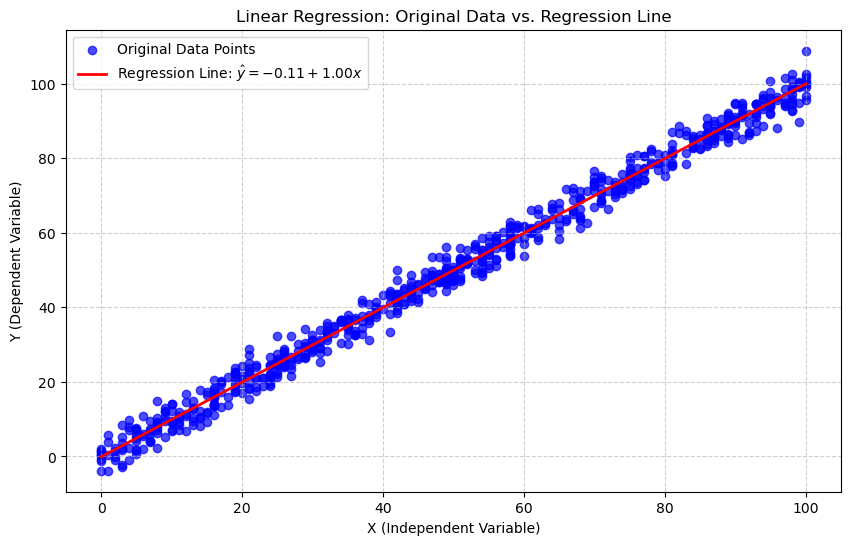

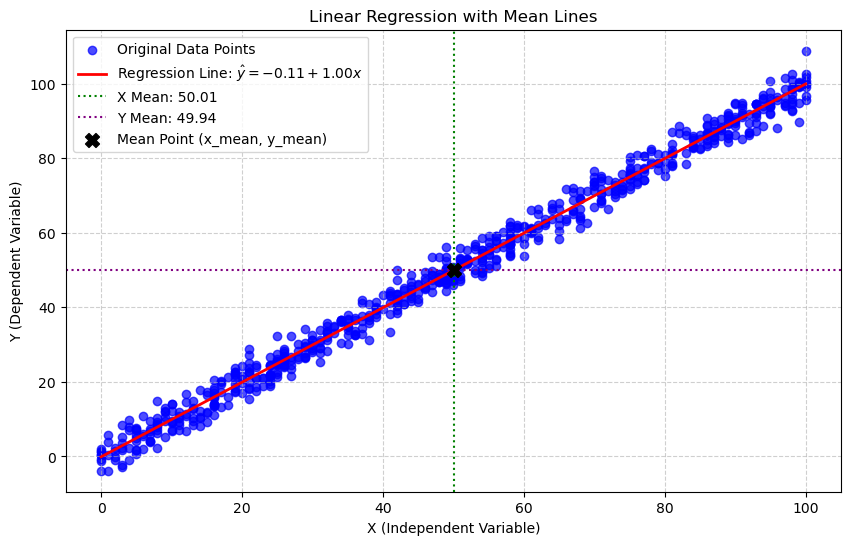

In [35]:
plt.figure(figsize=(10, 6)) # Set the figure size for better readability

# Plot the original data points as a scatter plot
plt.scatter(df['x'], df['y'], color='blue', label='Original Data Points', alpha=0.7)

# Plot the regression line
plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Regression Line: $\\hat{{y}} = {X0:.2f} + {X1:.2f}x$')

# Add labels and title
plt.xlabel('X (Independent Variable)')
plt.ylabel('Y (Dependent Variable)')
plt.title('Linear Regression: Original Data vs. Regression Line')
plt.grid(True, linestyle='--', alpha=0.6) # Add a grid for better readability
plt.legend() # Display the legend
plt.show()

# Optional: Add mean lines for context
plt.figure(figsize=(10, 6))
plt.scatter(df['x'], df['y'], color='blue', label='Original Data Points', alpha=0.7)
plt.plot(x_line, y_line, color='red', linewidth=2, label=f'Regression Line: $\\hat{{y}} = {X0:.2f} + {X1:.2f}x$')

# Plot x_mean and y_mean lines
plt.axvline(x=x_mean, color='green', linestyle=':', label=f'X Mean: {x_mean:.2f}')
plt.axhline(y=y_mean, color='purple', linestyle=':', label=f'Y Mean: {y_mean:.2f}')
plt.scatter(x_mean, y_mean, color='black', s=100, marker='X', label='Mean Point (x_mean, y_mean)', zorder=5) # Plot the mean point

plt.xlabel('X (Independent Variable)')
plt.ylabel('Y (Dependent Variable)')
plt.title('Linear Regression with Mean Lines')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

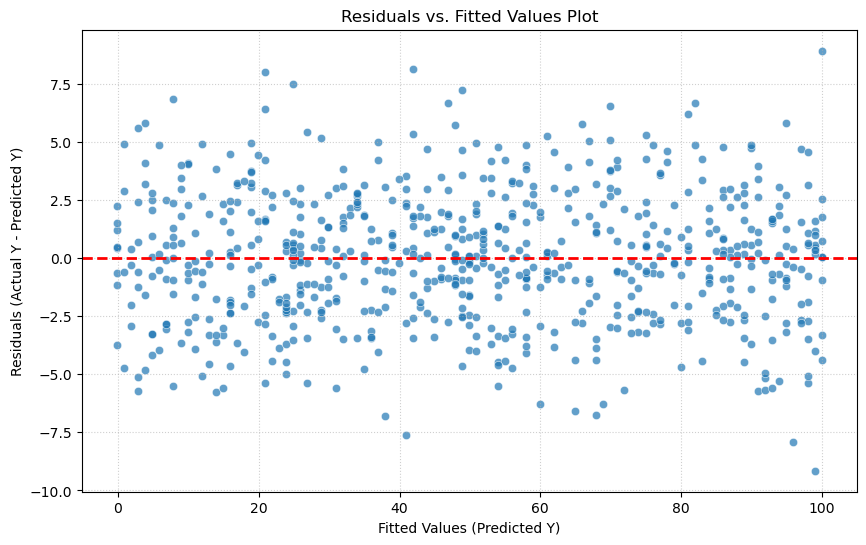

In [37]:
y_predicted = X0 + X1 * df['x']
residuals = df['y'] - y_predicted

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_predicted, y=residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2) # Line at zero
plt.xlabel('Fitted Values (Predicted Y)')
plt.ylabel('Residuals (Actual Y - Predicted Y)')
plt.title('Residuals vs. Fitted Values Plot')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

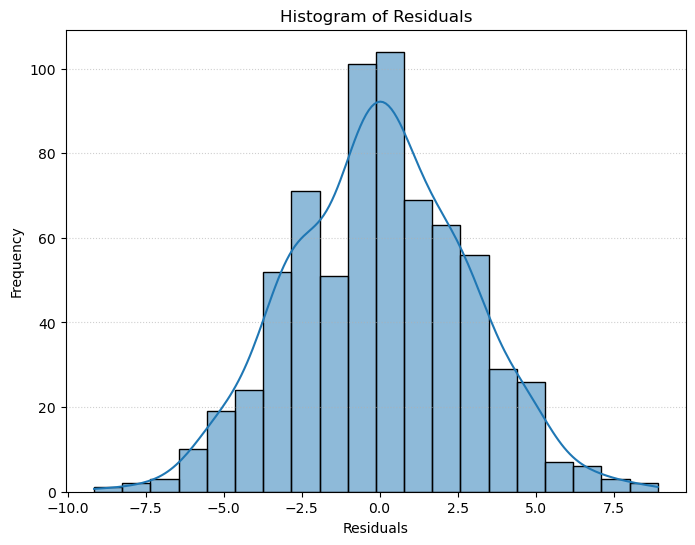

In [41]:
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=20) # kde=True adds a kernel density estimate
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.grid(axis='y', linestyle=':', alpha=0.6)
plt.show()

# Using library

In [42]:
from sklearn.linear_model import LinearRegression # This is the star of the show!
from sklearn.model_selection import train_test_split

In [45]:
X = df['x'].values.reshape(-1, 1)
y = df['y'].values
print("Shape of X (features):", X.shape) # Should be (n_samples, 1)
print("Shape of y (target):", y.shape)   # Should be (n_samples,)

Shape of X (features): (699, 1)
Shape of y (target): (699,)


In [47]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [49]:
# The slope (coefficient) is stored in .coef_
slope_beta1 = model.coef_[0]
# The intercept is stored in .intercept_
intercept_beta0 = model.intercept_

print(f"\n--- Learned Parameters from Scikit-learn ---")
print(f"Intercept (X0 or Beta_0): {intercept_beta0:.4f}")
print(f"Slope (X1 or Beta_1): {slope_beta1:.4f}")


--- Learned Parameters from Scikit-learn ---
Intercept (X0 or Beta_0): -0.1073
Slope (X1 or Beta_1): 1.0007


In [50]:
y_predicted = model.predict(X)

print(f"\nFirst 5 Actual Y values: {y[:5]}")
print(f"First 5 Predicted Y values: {y_predicted[:5].round(2)}")


First 5 Actual Y values: [21.54945196 47.46446305 17.21865634 36.58639803 87.28898389]
First 5 Predicted Y values: [23.91 49.93 14.9  37.92 86.95]


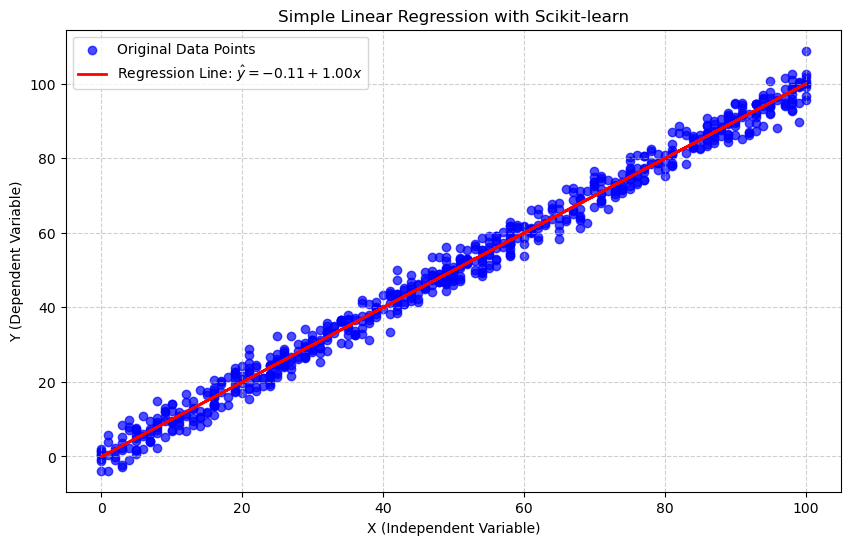


--- Model Evaluation (Optional but good practice) ---
R-squared (Coefficient of Determination): 0.9907
This indicates how well the model fits the data (closer to 1 is better).


In [51]:
plt.figure(figsize=(10, 6))

# Plot the original data points
plt.scatter(X, y, color='blue', label='Original Data Points', alpha=0.7)

# Plot the regression line using the predicted values
plt.plot(X, y_predicted, color='red', linewidth=2,
         label=f'Regression Line: $\\hat{{y}} = {intercept_beta0:.2f} + {slope_beta1:.2f}x$')

plt.xlabel('X (Independent Variable)')
plt.ylabel('Y (Dependent Variable)')
plt.title('Simple Linear Regression with Scikit-learn')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

print("\n--- Model Evaluation (Optional but good practice) ---")
# You can also get the R-squared value directly from the model
r_squared = model.score(X, y)
print(f"R-squared (Coefficient of Determination): {r_squared:.4f}")
print("This indicates how well the model fits the data (closer to 1 is better).")
